Seismic Event Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       100 non-null    datetime64[ns]
 1   Magnitude  100 non-null    float64       
 2   Depth      100 non-null    float64       
 3   Location   100 non-null    object        
 4   key        100 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ KB
None


Volcanic Activity Records:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             50 non-null     datetime64[ns]
 1   Volcano          50 non-null     object        
 2   Eruption_Type    50 non-null     object        
 3   Magnitude        50 non-null     float64       
 4   Duration

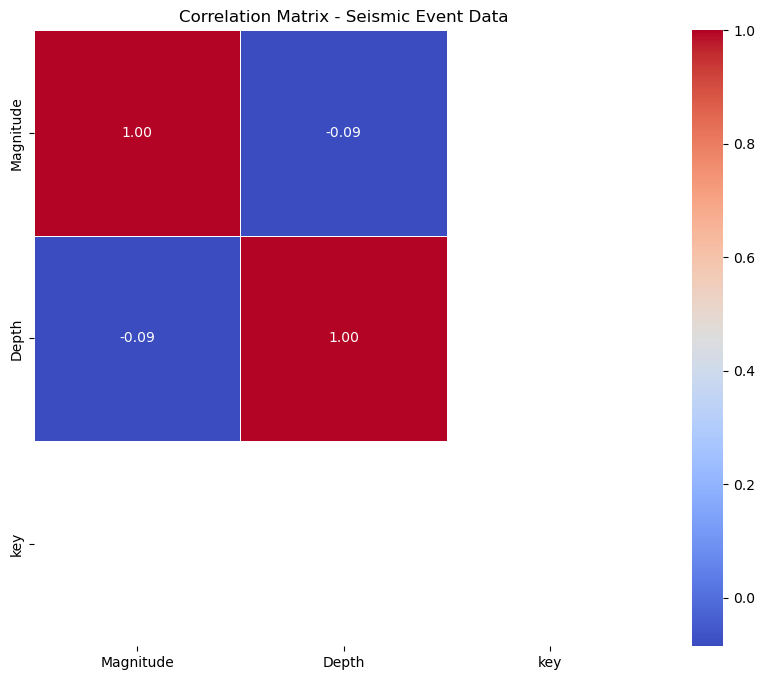

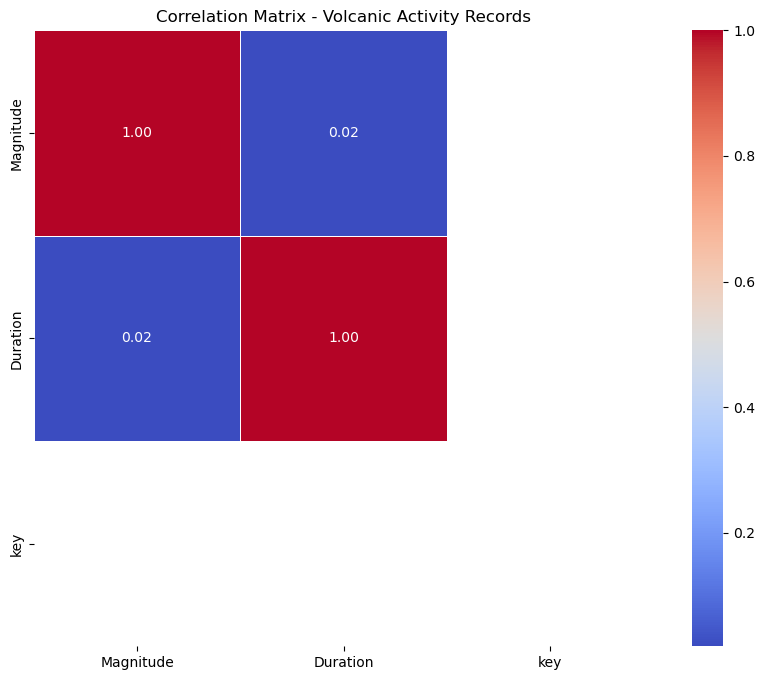

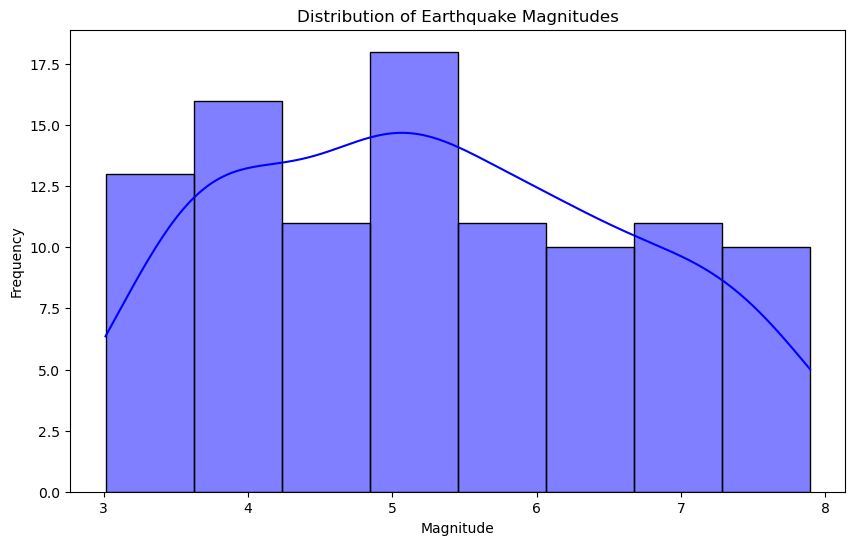

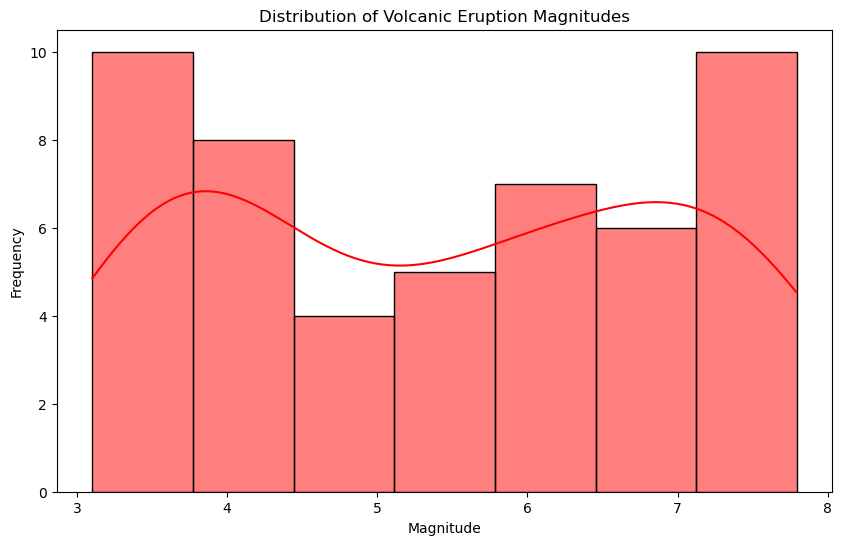

C:\Users\User1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

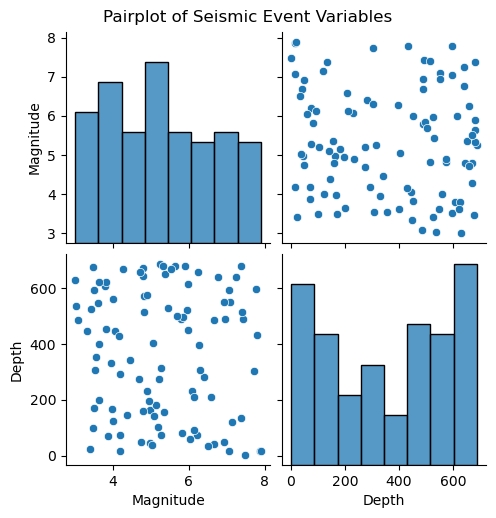

C:\Users\User1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

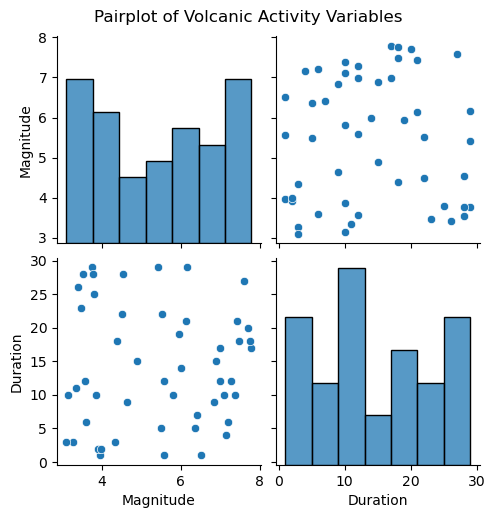

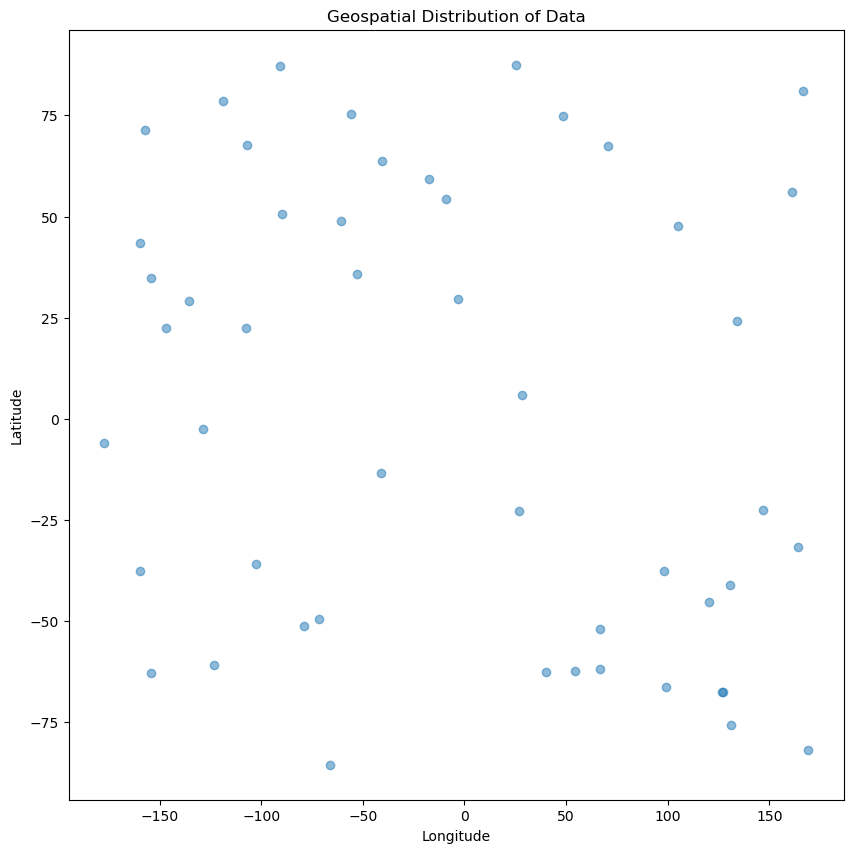

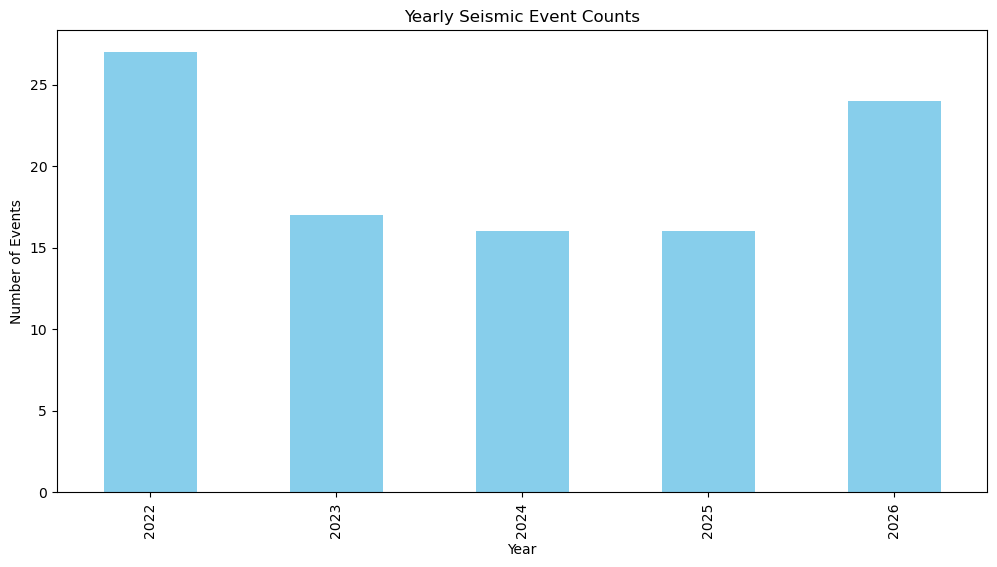

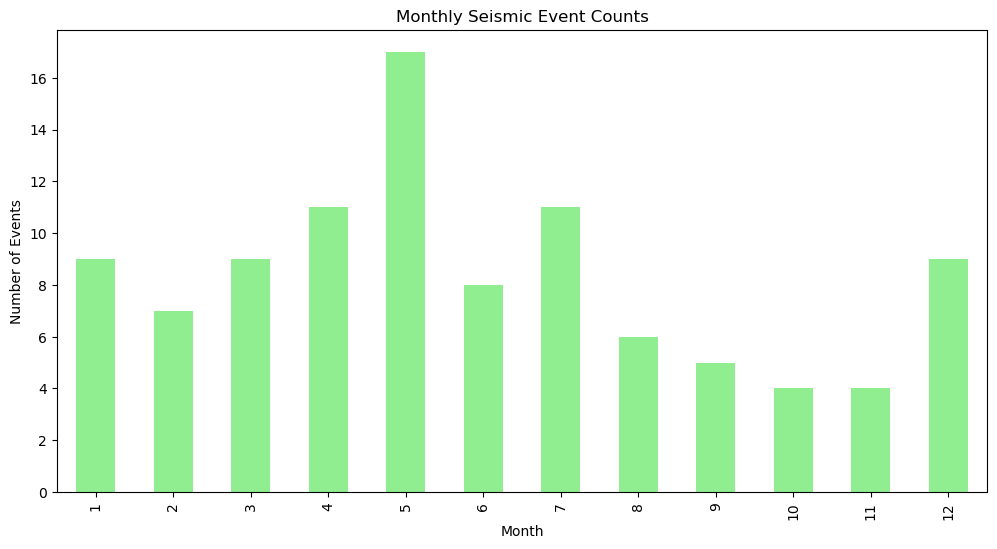

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'\Users\User1\anaconda3\alfe\DataFrame\seismic_event_data.csv'
seismic_data = pd.read_csv(file_path, parse_dates = ['Date'])

file_path2 = r'\Users\User1\anaconda3\alfe\DataFrame\volcanic_activity_records.csv'
volcanic_data = pd.read_csv(file_path2, parse_dates = ['Date'])

file_path3 = r'\Users\User1\anaconda3\alfe\DataFrame\geospatial_data.csv'
geospatial_data = pd.read_csv(file_path3)

file_path4 = r'\Users\User1\anaconda3\alfe\DataFrame\atmospheric_gas_emission_data.csv'
atmospheric_data = pd.read_csv(file_path4)

file_path5 = r'\Users\User1\anaconda3\alfe\DataFrame\satellite_imagery_ground_deformation.csv'
satellite_data = pd.read_csv(file_path5)

file_path6 = r'\Users\User1\anaconda3\alfe\DataFrame\historical_environmental_factors.csv'
environmental_data = pd.read_csv(file_path6)

combined_data = pd.merge(seismic_data, volcanic_data, on='Date', how='outer')

seismic_data['key'] = 1
volcanic_data['key'] = 1

combined_data = pd.merge(seismic_data, volcanic_data, on='key', how='outer')
combined_data.drop('key', axis=1, inplace=True)

print("Seismic Event Data:")
print(seismic_data.info())
print("\n")

print("Volcanic Activity Records:")
print(volcanic_data.info())
print("\n")

print("Geospatial Data:")
print(geospatial_data.info())
print("\n")

print("Atmospheric and Gas Emission Data:")
print(atmospheric_data.info())
print("\n")

print("Satellite Imagery for Ground Deformation:")
print(satellite_data.info())
print("\n")

print("Historical Environmental Factors:")
print(environmental_data.info())
print("\n")

seismic_numeric_data = seismic_data.select_dtypes(include=['float64', 'int64'])

seismic_corr = seismic_numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(seismic_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Seismic Event Data")
plt.show()

volcanic_numeric_data = volcanic_data.select_dtypes(include=['float64', 'int64'])
volcanic_corr = volcanic_numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(volcanic_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Volcanic Activity Records")
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(seismic_data['Magnitude'], kde=True, color='blue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(volcanic_data['Magnitude'], kde=True, color='red')
plt.title("Distribution of Volcanic Eruption Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(seismic_data[['Magnitude', 'Depth']])
plt.suptitle("Pairplot of Seismic Event Variables", y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(volcanic_data[['Magnitude', 'Duration']])
plt.suptitle("Pairplot of Volcanic Activity Variables", y=1.02)
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(geospatial_data['Longitude'], geospatial_data['Latitude'], alpha=0.5)
plt.title("Geospatial Distribution of Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

seismic_data['Date'] = pd.to_datetime(seismic_data['Date'])

seismic_data['Year'] = seismic_data['Date'].dt.year
seismic_data['Month'] = seismic_data['Date'].dt.month

plt.figure(figsize=(12, 6))
seismic_yearly_counts = seismic_data['Year'].value_counts().sort_index()
seismic_yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Yearly Seismic Event Counts")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()

plt.figure(figsize=(12, 6))
seismic_monthly_counts = seismic_data['Month'].value_counts().sort_index()
seismic_monthly_counts.plot(kind='bar', color='lightgreen')
plt.title("Monthly Seismic Event Counts")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.show()